# Perguntas a responder

Qual o impacto que a campanha teve na adesão ao programa de fidelidade (bruto/ líquido)?
Quantidade de clientes incritos efetivos e quantidade de saintes da campanha.

A adoção da campanha foi mais bem-sucedida para certos dados demográficos de membros de fidelidade?

Que impacto teve a campanha nos voos reservados durante o verão de 2018?

Posso criar um modelo de machine learning para prever o risco de Churn?

Temos dados para o período 2012 - 2018 dos titulares do cartão fidelidade
E dois anos 2017-2018 de dados de voos
A campanha de 2018 participou durante 3 meses de fevereiro a abril daquele ano
Aqueles que participaram da promoção, reservaram voos apenas em 2017 e 2018 anos

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [214]:
data_flight = pd.read_csv('Customer Flight Activity.csv')
data_history = pd.read_csv('Customer Loyalty History.csv')

In [215]:
data_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [216]:
data_history.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [217]:
data_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [218]:
data_history.isna().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [219]:

data_history['Date'] = pd.to_datetime(
    data_history['Enrollment Year'].astype(str) + '-' + 
    data_history['Enrollment Month'].astype(str) + '-01'
)

In [220]:
filtra_campanha = data_history[data_history['Enrollment Type'] == '2018 Promotion']
filtra_campanha['Enrollment Month'].unique()

array([3, 4, 2], dtype=int64)

In [221]:
# Quantidade de inscrições no ano de 2018
contagem_filtra_campanha = filtra_campanha.shape[0]


# Filtragem de incrições canceladas no ano de 2018 nos meses de Fevereiro, Março e Abril
promo_cancelada_2018 = data_history[(data_history['Cancellation Year'] == 2018) & (data_history['Cancellation Month'].isin([2, 3, 4]))]

# Outputs
print('Cadastro na Promoção: ', contagem_filtra_campanha)
print('Cadastros Cancelados:', promo_cancelada_2018.shape[0])
print('Assinaturas finais da Promoção: ', contagem_filtra_campanha - promo_cancelada_2018.shape[0]) # Número de assinaturas que não foram canceladas.


Cadastro na Promoção:  971
Cadastros Cancelados: 141
Assinaturas finais da Promoção:  830


In [222]:
# Filtrar dados dos anos de 2017 e 2018
data_promocao = data_history[(data_history['Enrollment Year'] >= 2017) & 
                             (data_history['Enrollment Year'] <= 2018)]

# Contagem incrições por mês
contagem_inscricao = data_promocao.groupby(['Enrollment Year', 'Enrollment Month']).size().reset_index(name='Count')

# Highlighting the promotion period
contagem_inscricao['Promotion Period'] = contagem_inscricao.apply(
    lambda x: 'Fev-Abr 2018' if (x['Enrollment Year'] == 2018 and 2 <= x['Enrollment Month'] <= 4) else 'Other', 
    axis=1
)

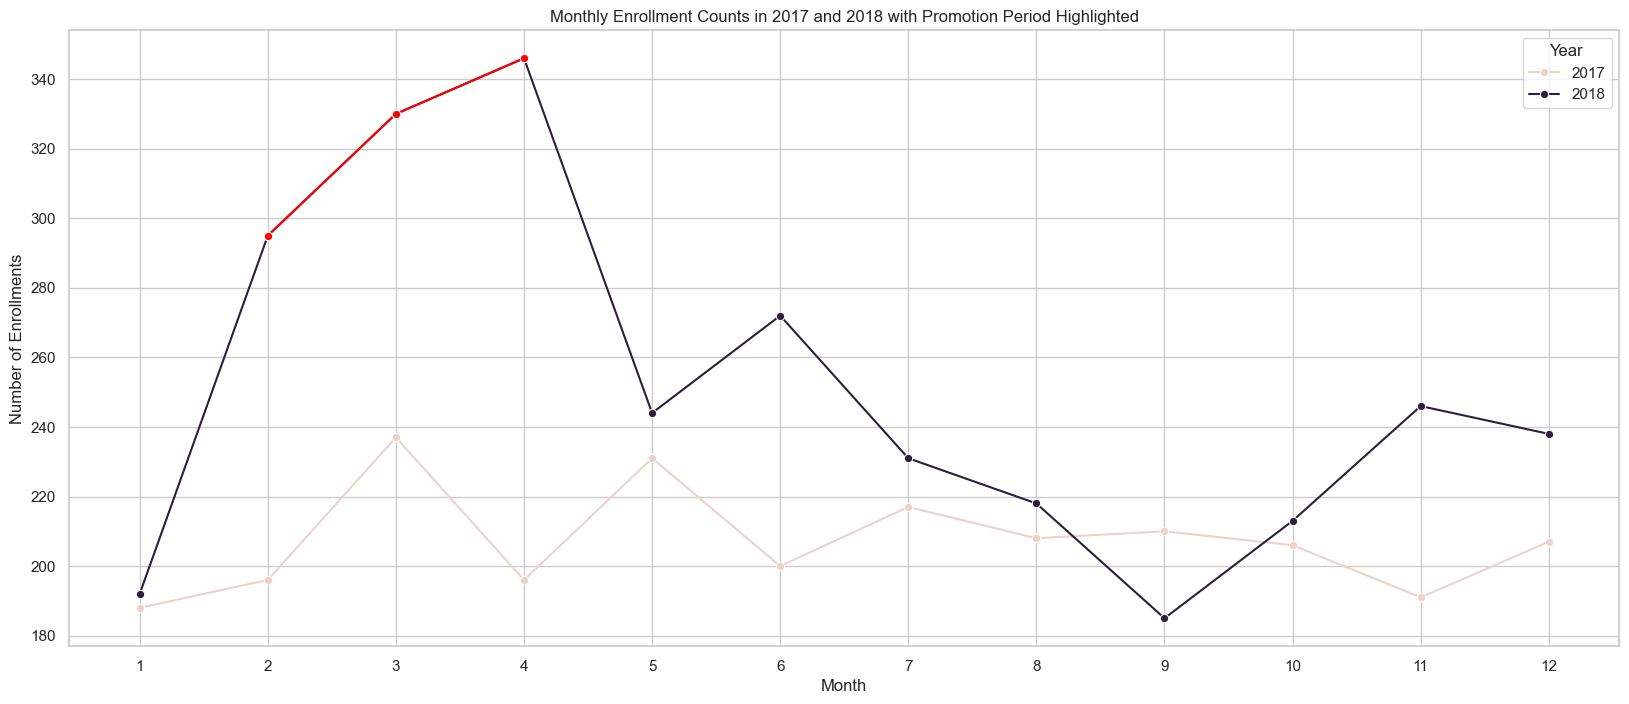

In [233]:
# Plotting enrollments for 2017 and 2018 with the promotion period highlighted
plt.figure(figsize=(20, 8))
sns.lineplot(data=contagem_inscricao, x='Enrollment Month', y='Count', hue='Enrollment Year', marker='o')

# Adding a line for the promotion period
periodo_promocao = contagem_inscricao[contagem_inscricao['Promotion Period'] == 'Fev-Abr 2018']
sns.lineplot(data=periodo_promocao, x='Enrollment Month', y='Count', color='red', marker='o')

plt.title('Monthly Enrollment Counts in 2017 and 2018 with Promotion Period Highlighted')
plt.xlabel('Month')
plt.ylabel('Number of Enrollments')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.show()

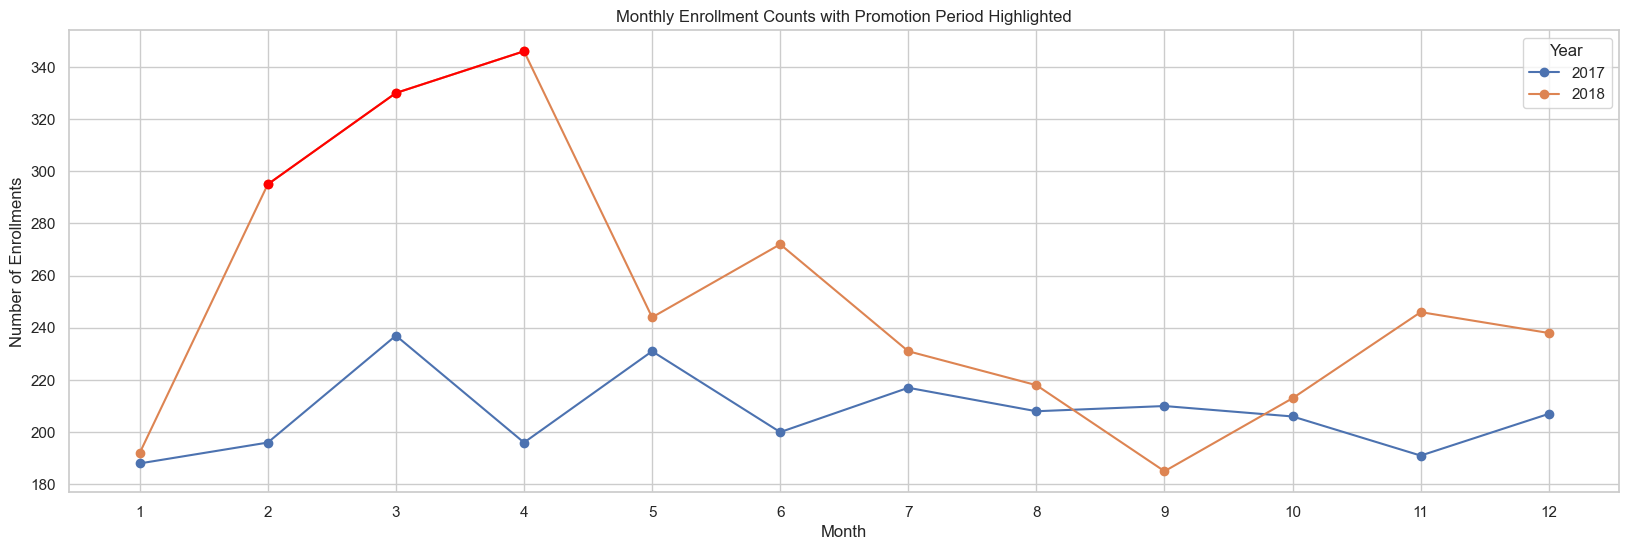

In [256]:
# Criando o gráfico de linha para as inscrições de 2017 e 2018
plt.figure(figsize=(20, 6))
for year in [2017, 2018]:
    ano = contagem_inscricao[contagem_inscricao['Enrollment Year'] == year]
    plt.plot(ano['Enrollment Month'], ano['Count'], marker='o',label=str(year))

# Destacando o período de promoção
plt.plot(periodo_promocao['Enrollment Month'], periodo_promocao['Count'], color='red', marker='o')

# Adicionando título e rótulos aos eixos
plt.title('Monthly Enrollment Counts with Promotion Period Highlighted')
plt.xlabel('Month')
plt.ylabel('Number of Enrollments')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)

# Exibindo o gráfico
plt.show()


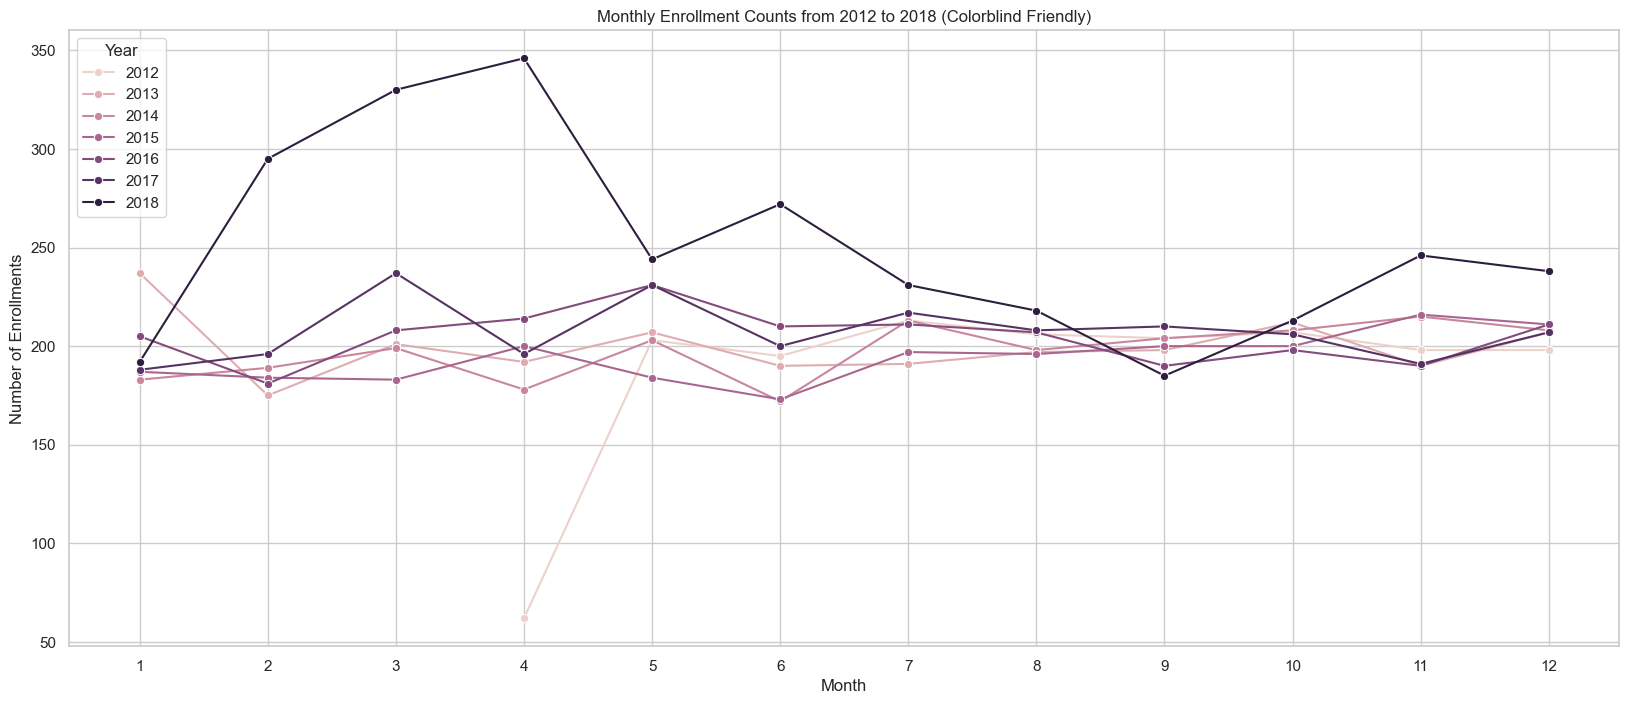

In [235]:
# Contagem de inscrições por mês de todo os ano.
todas_inscricoes_por_ano = data_history.groupby(['Enrollment Year', 'Enrollment Month']).size().reset_index(name='Count')

# Gráfico de inscrições de 2012 à 2018
plt.figure(figsize=(20, 8))
sns.lineplot(data=todas_inscricoes_por_ano, x='Enrollment Month', y='Count', hue='Enrollment Year', marker='o')

plt.title('Monthly Enrollment Counts from 2012 to 2018 (Colorblind Friendly)')
plt.xlabel('Month')
plt.ylabel('Number of Enrollments')
plt.xticks(range(1, 13))
plt.legend(title='Year', loc='upper left')
plt.grid(True)
plt.show()

Part 2: Was the campaign adoption more successful for certain demographics of loyalty members?

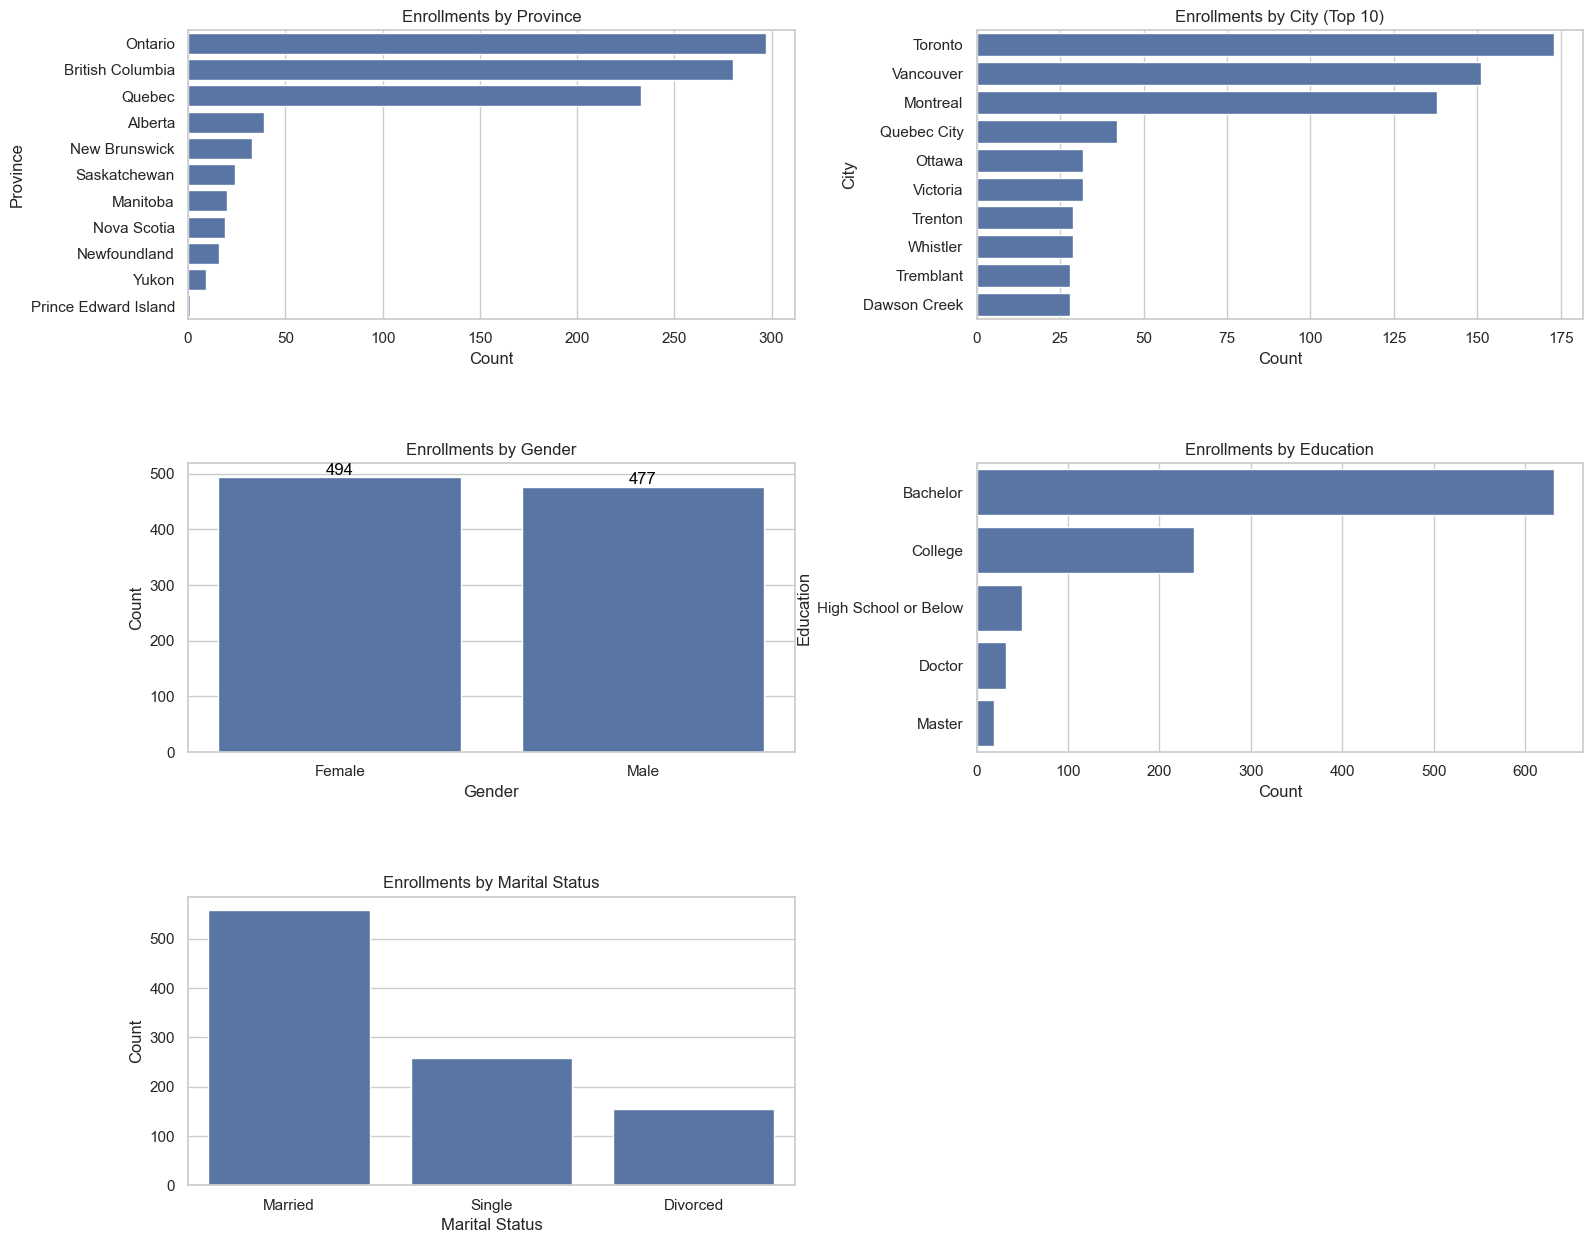

In [236]:
# Analyzing demographics
demographics = ['Province', 'City', 'Gender', 'Education', 'Salary', 'Marital Status']
demographic_analysis = {demo: filtra_campanha[demo].value_counts().reset_index() 
                        for demo in demographics}
for demo in demographics:
    demographic_analysis[demo].columns = [demo, 'Count']

# # Set a dark background theme
# sns.set(style="whitegrid")


# Plotting demographics with shades of blue
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Plot for Province
sns.barplot(x='Count', y='Province', data=demographic_analysis['Province'], ax=axes[0, 0])
axes[0, 0].set_title('Enrollments by Province')
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_ylabel('Province')

# Plot for City (top 10 cities)
top_cities = demographic_analysis['City'].head(10)
sns.barplot(x='Count', y='City', data=top_cities, ax=axes[0, 1])
axes[0, 1].set_title('Enrollments by City (Top 10)')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('City')

# Plot for Gender with labels
gender_plot = sns.barplot(x='Gender', y='Count', data=demographic_analysis['Gender'], ax=axes[1, 0])
axes[1, 0].set_title('Enrollments by Gender')
axes[1, 0].set_xlabel('Gender')
axes[1, 0].set_ylabel('Count')
for p in gender_plot.patches:
    gender_plot.annotate(f"{int(p.get_height())}", 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         fontsize=12, 
                         color='black', 
                         xytext=(0, 5), 
                         textcoords='offset points')

# Plot for Education
sns.barplot(x='Count', y='Education', data=demographic_analysis['Education'], ax=axes[1, 1])
axes[1, 1].set_title('Enrollments by Education')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Education')

# Plot for Marital Status
sns.barplot(x='Marital Status', y='Count', data=demographic_analysis['Marital Status'], ax=axes[2, 0])
axes[2, 0].set_title('Enrollments by Marital Status')
axes[2, 0].set_xlabel('Marital Status')
axes[2, 0].set_ylabel('Count')

# Removing the empty plot
axes[2, 1].axis('off')

plt.show()


In [226]:
aux1 = df.groupby(['Month', 'Year'])['Total Flights'].sum().reset_index()
aux1

,Month,Year,Total Flights
0,1,2017,59888
1,1,2018,59751
2,2,2017,59760
3,2,2018,59089
4,3,2017,80140
5,3,2018,82119
6,4,2017,70015
7,4,2018,69263
8,5,2017,81353
9,5,2018,96450


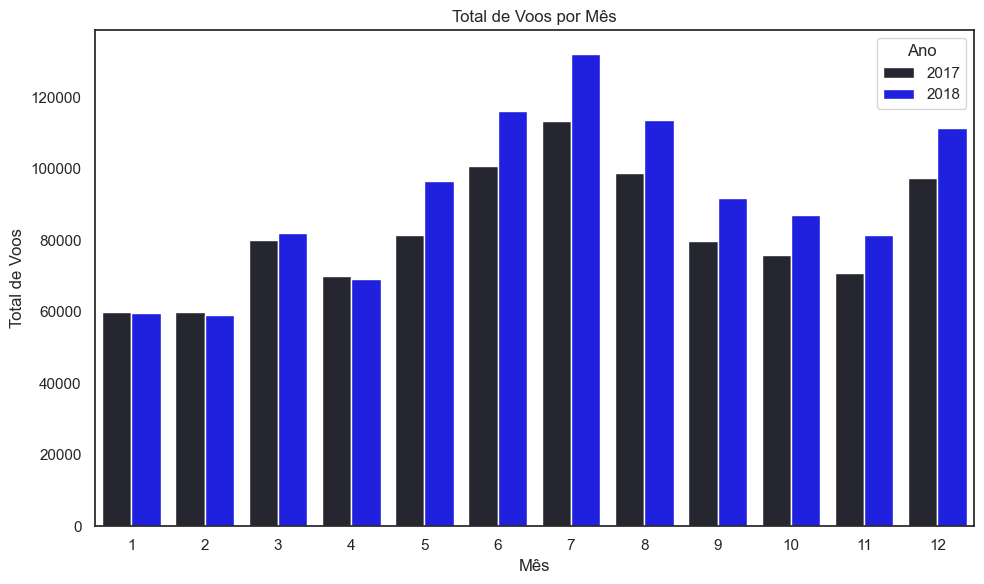

In [227]:
# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=aux1, x='Month', y='Total Flights', hue='Year', color = 'blue')
plt.title('Total de Voos por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Voos')
plt.legend(title='Ano')
plt.tight_layout()
plt.show()

In [228]:
df1.Salary[df1.Salary <0].reset_index().sort_values(by = 'Salary')

,index,Salary
8,7373,-58486.0
19,16735,-57297.0
0,1082,-49830.0
10,8767,-49001.0
15,14327,-47310.0
2,2471,-46683.0
13,12596,-46470.0
18,16431,-46303.0
3,3575,-45962.0
5,4712,-43234.0
